# logistic回归

看书这几天加深了我对logistic的理解，特别是感知机和梯度下降算法。李航这本书难归难，需要极强的数学推导能力和理论基础才能看得懂。其中说了机器学习的三要素模型，策略，算法，模型就是学习的条件概率分布或者决策函数，策略就是要以什么样的准则或选择最优模型，算法就是学习模型的具体计算方法。

此处weights的初始值为１，为了加速收敛。

In [1]:
import numpy as np

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])  
        # 注意特征第一个维度值设置为1，为什么多个1呢，因为把偏置项b也放到了权重之中。
        # 最后得到的回归函数形式为y=w[0]+w[1]*x1+...+w[N]*xN.
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.zeros((n,1)) 
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

In [2]:
dataArr, labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

matrix([[ 3.90548504],
        [ 0.46094335],
        [-0.58933895]])

In [3]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3, 3.0, 0.1)  # 生成-3到3的数组
    y = (-weights[0] - weights[1] * x) / weights[2]  # 此处计算 0 = w0 + w1 * x + w2 * y
    ax.plot(x,y)                                      # numpy的除号对于矩阵来说是对应元素相除
    plt.show()

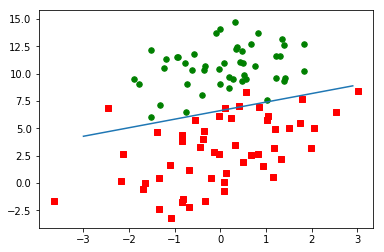

In [5]:
dataArr, labelMat = loadDataSet()
weight = gradAscent(dataArr, labelMat)
plotBestFit(np.array(weight))

# 随机梯度下降

梯度下降算法比较精确，这是因为每次都对所有样本计算梯度取平均值获取，所以当样本过大时就会无法计算，向量化后的公式如下:
$$\theta = \theta + aX^TE$$

这个公式的意义就是每个$\theta$的取值都等于其本身的值加上所有的样本在$J$特征下的投影(行向量)与该样本产生的误差(列向量)相乘得到的点阵。

而随机梯度下降的公式则为:

$$\theta = \theta + aEX^i$$

随机梯度下降是一个极端，每次只使用一个样本进行迭代，公式意义就是每个$\theta$的值都等于其本身加上第$i$个样本所有特征投影(行向量)与其对应的误差(列向量)的乘积。

In [8]:
def stoGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    data = np.array(dataMatrix)  # 此处要经过一次变化，因为dataMatrix是List要转换成array才能与浮点数相乘
    weights = np.ones(n, dtype=np.float64)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] *  weights))  # 数值
        error = classLabels[i] - h  # 数值
        weights = weights + alpha * error * data[i]  # 向量
    return weights

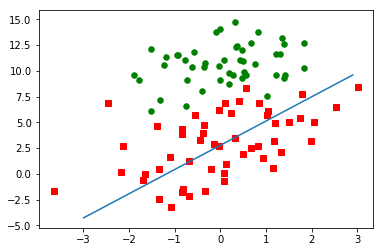

In [9]:
dataArr, labelMat = loadDataSet()
weight = stoGradAscent0(dataArr, labelMat)
plotBestFit(np.array(weight))